<a href="https://colab.research.google.com/github/devaminta/amharic_n_gram_model/blob/main/nlp_assignment_pre_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download the file by ID
file_id = '1jEOAORylTBAiNKes_JerD6gFF7cnLFyr'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('myfile')  # Save the file locally


In [3]:
import mimetypes

file_type, encoding = mimetypes.guess_type("myfile")
print("File type:", file_type)

File type: None


In [4]:
with open("myfile", "r") as f:
    print(f.read())


In [6]:
!pip install python-magic


In [7]:
import magic

file_path = 'myfile'  # Replace with your file path

# Create a magic instance and detect the file type
file_type = magic.from_file(file_path, mime=True)
print(f"Detected file type: {file_type}")


Detected file type: text/plain


In [8]:
with open('myfile', 'r') as f:
    content = f.read(500)  # Read the first 500 characters to inspect
print(content)


    ምን መሰላችሁ? (አንባቢያን) ኢትዮጵያ በተደጋጋሚ ጥሪው ደርሷት ልትታደመው ያልቻለችው የአለም የእግር ኳስ ዋ ለ19ኛ ጊዜ በደቡብ አፍሪካ ሲጠጣ፣ በሩቅ እያየች አንጀቷ ባረረ ልክ በአመቱ በለስ ቀናትና ሌላ ዋ ልትታደም ሁለት ልጆቿን ወደ ደቡብ አፍሪካ ላከች፡፡6ኛው ቢግ ብራዘርስ አፍሪካ አብሮ የመኖር ውድድር በደቡብ አፍሪካ ተካሂዷል፡፡ ከተለያዩ 14 የአፍሪካ አገራት የተውጣጡ 26 ያህል ተሳታፊዎች የተካፈሉበት ይህ ውድድር፣ ግለሰቦች በፈታኝ ሁኔታ ውስጥ በማለፍ ብቃታቸውን የሚያስመሰክሩበት መሆኑን ሰምተናል፡፡ የሚገጥሟቸውን የተለያዩ ፈተናዎች በትእግስትና በጥበብ ማለፍ፣ ከሌሎች ጋር ተስማምቶ መዝለቅ፣ ችግሮችን በብልጠት መፍታት ወዘተ     በየጊዜው ከሚደረገው ቅነሳ ተርፈው ለ91 ቀናት ያህል በውድድሩ መቆየት የቻሉ ሁለት ተወዳዳሪዎች እያንዳንዳቸው 200 ሺህ ዶላር እንደሚ


In [45]:
import nltk
import numpy as np
import matplotlib.pyplot as plt
from nltk import ngrams
from wordcloud import WordCloud
from collections import Counter
import re
from google.colab import drive



In [46]:
content = re.sub(r'[^\w\s]', '', content)
tokens = content.split()  #

In [11]:
tokens

['ምን',
 'መሰላችሁ',
 'አንባቢያን',
 'ኢትዮጵያ',
 'በተደጋጋሚ',
 'ጥሪው',
 'ደርሷት',
 'ልትታደመው',
 'ያልቻለችው',
 'የአለም',
 'የእግር',
 'ኳስ',
 'ዋ',
 'ለ19ኛ',
 'ጊዜ',
 'በደቡብ',
 'አፍሪካ',
 'ሲጠጣ',
 'በሩቅ',
 'እያየች',
 'አንጀቷ',
 'ባረረ',
 'ልክ',
 'በአመቱ',
 'በለስ',
 'ቀናትና',
 'ሌላ',
 'ዋ',
 'ልትታደም',
 'ሁለት',
 'ልጆቿን',
 'ወደ',
 'ደቡብ',
 'አፍሪካ',
 'ላከች6ኛው',
 'ቢግ',
 'ብራዘርስ',
 'አፍሪካ',
 'አብሮ',
 'የመኖር',
 'ውድድር',
 'በደቡብ',
 'አፍሪካ',
 'ተካሂዷል',
 'ከተለያዩ',
 '14',
 'የአፍሪካ',
 'አገራት',
 'የተውጣጡ',
 '26',
 'ያህል',
 'ተሳታፊዎች',
 'የተካፈሉበት',
 'ይህ',
 'ውድድር',
 'ግለሰቦች',
 'በፈታኝ',
 'ሁኔታ',
 'ውስጥ',
 'በማለፍ',
 'ብቃታቸውን',
 'የሚያስመሰክሩበት',
 'መሆኑን',
 'ሰምተናል',
 'የሚገጥሟቸውን',
 'የተለያዩ',
 'ፈተናዎች',
 'በትእግስትና',
 'በጥበብ',
 'ማለፍ',
 'ከሌሎች',
 'ጋር',
 'ተስማምቶ',
 'መዝለቅ',
 'ችግሮችን',
 'በብልጠት',
 'መፍታት',
 'ወዘተ',
 'በየጊዜው',
 'ከሚደረገው',
 'ቅነሳ',
 'ተርፈው',
 'ለ91',
 'ቀናት',
 'ያህል',
 'በውድድሩ',
 'መቆየት',
 'የቻሉ',
 'ሁለት',
 'ተወዳዳሪዎች',
 'እያንዳንዳቸው',
 '200',
 'ሺህ',
 'ዶላር',
 'እንደሚ']

In [12]:
def generate_ngrams(tokens, n):
    return list(ngrams(tokens, n))

unigrams = generate_ngrams(tokens, 1)
bigrams = generate_ngrams(tokens, 2)
trigrams = generate_ngrams(tokens, 3)
fourgrams = generate_ngrams(tokens, 4)

# Print samples
print("Sample unigrams:", unigrams[:10])
print("Sample bigrams:", bigrams[:10])
print("Sample trigrams:", trigrams[:10])
print("Sample fourgrams:", fourgrams[:10])


Sample unigrams: [('ምን',), ('መሰላችሁ',), ('አንባቢያን',), ('ኢትዮጵያ',), ('በተደጋጋሚ',), ('ጥሪው',), ('ደርሷት',), ('ልትታደመው',), ('ያልቻለችው',), ('የአለም',)]
Sample bigrams: [('ምን', 'መሰላችሁ'), ('መሰላችሁ', 'አንባቢያን'), ('አንባቢያን', 'ኢትዮጵያ'), ('ኢትዮጵያ', 'በተደጋጋሚ'), ('በተደጋጋሚ', 'ጥሪው'), ('ጥሪው', 'ደርሷት'), ('ደርሷት', 'ልትታደመው'), ('ልትታደመው', 'ያልቻለችው'), ('ያልቻለችው', 'የአለም'), ('የአለም', 'የእግር')]
Sample trigrams: [('ምን', 'መሰላችሁ', 'አንባቢያን'), ('መሰላችሁ', 'አንባቢያን', 'ኢትዮጵያ'), ('አንባቢያን', 'ኢትዮጵያ', 'በተደጋጋሚ'), ('ኢትዮጵያ', 'በተደጋጋሚ', 'ጥሪው'), ('በተደጋጋሚ', 'ጥሪው', 'ደርሷት'), ('ጥሪው', 'ደርሷት', 'ልትታደመው'), ('ደርሷት', 'ልትታደመው', 'ያልቻለችው'), ('ልትታደመው', 'ያልቻለችው', 'የአለም'), ('ያልቻለችው', 'የአለም', 'የእግር'), ('የአለም', 'የእግር', 'ኳስ')]
Sample fourgrams: [('ምን', 'መሰላችሁ', 'አንባቢያን', 'ኢትዮጵያ'), ('መሰላችሁ', 'አንባቢያን', 'ኢትዮጵያ', 'በተደጋጋሚ'), ('አንባቢያን', 'ኢትዮጵያ', 'በተደጋጋሚ', 'ጥሪው'), ('ኢትዮጵያ', 'በተደጋጋሚ', 'ጥሪው', 'ደርሷት'), ('በተደጋጋሚ', 'ጥሪው', 'ደርሷት', 'ልትታደመው'), ('ጥሪው', 'ደርሷት', 'ልትታደመው', 'ያልቻለችው'), ('ደርሷት', 'ልትታደመው', 'ያልቻለችው', 'የአለም'), ('ልትታደመው', 'ያልቻለችው', 'የአለም', 'የእግር'), ('ያልቻለችው', 'የአለም', 'የእግር', 'ኳስ'),

In [13]:
def get_ngram_probabilities(ngrams):
    ngram_counts = Counter(ngrams)
    total_count = sum(ngram_counts.values())
    ngram_probabilities = {ngram: count / total_count for ngram, count in ngram_counts.items()}
    return ngram_probabilities

unigram_probs = get_ngram_probabilities(unigrams)
bigram_probs = get_ngram_probabilities(bigrams)
trigram_probs = get_ngram_probabilities(trigrams)
fourgram_probs = get_ngram_probabilities(fourgrams)

# Get top 10 n-grams for each
print("Top 10 unigrams:", Counter(unigram_probs).most_common(10))
print("Top 10 bigrams:", Counter(bigram_probs).most_common(10))
print("Top 10 trigrams:", Counter(trigram_probs).most_common(10))
print("Top 10 fourgrams:", Counter(fourgram_probs).most_common(10))


Top 10 unigrams: [(('አፍሪካ',), 0.042105263157894736), (('ዋ',), 0.021052631578947368), (('በደቡብ',), 0.021052631578947368), (('ሁለት',), 0.021052631578947368), (('ውድድር',), 0.021052631578947368), (('ያህል',), 0.021052631578947368), (('ምን',), 0.010526315789473684), (('መሰላችሁ',), 0.010526315789473684), (('አንባቢያን',), 0.010526315789473684), (('ኢትዮጵያ',), 0.010526315789473684)]
Top 10 bigrams: [(('በደቡብ', 'አፍሪካ'), 0.02127659574468085), (('ምን', 'መሰላችሁ'), 0.010638297872340425), (('መሰላችሁ', 'አንባቢያን'), 0.010638297872340425), (('አንባቢያን', 'ኢትዮጵያ'), 0.010638297872340425), (('ኢትዮጵያ', 'በተደጋጋሚ'), 0.010638297872340425), (('በተደጋጋሚ', 'ጥሪው'), 0.010638297872340425), (('ጥሪው', 'ደርሷት'), 0.010638297872340425), (('ደርሷት', 'ልትታደመው'), 0.010638297872340425), (('ልትታደመው', 'ያልቻለችው'), 0.010638297872340425), (('ያልቻለችው', 'የአለም'), 0.010638297872340425)]
Top 10 trigrams: [(('ምን', 'መሰላችሁ', 'አንባቢያን'), 0.010752688172043012), (('መሰላችሁ', 'አንባቢያን', 'ኢትዮጵያ'), 0.010752688172043012), (('አንባቢያን', 'ኢትዮጵያ', 'በተደጋጋሚ'), 0.010752688172043012), (('ኢት

In [25]:
def check_probability(data, ngram_type):
    for ngram, prob in data.items():  # .items() to get both key (ngram) and value (prob)
        if prob == 0:
            print(f"Warning: Probability of {ngram} is 0 in {ngram_type}.")
        else:
            print(f"Probability of {ngram} in {ngram_type}: {prob}")

# Check for unigrams, bigrams, trigrams, and fourgrams
check_probability(unigram_probs, "unigrams")
check_probability(bigram_probs, "bigrams")
check_probability(trigram_probs, "trigrams")
check_probability(fourgram_probs, "fourgrams")


Probability of ('ምን',) in unigrams: 0.010526315789473684
Probability of ('መሰላችሁ',) in unigrams: 0.010526315789473684
Probability of ('አንባቢያን',) in unigrams: 0.010526315789473684
Probability of ('ኢትዮጵያ',) in unigrams: 0.010526315789473684
Probability of ('በተደጋጋሚ',) in unigrams: 0.010526315789473684
Probability of ('ጥሪው',) in unigrams: 0.010526315789473684
Probability of ('ደርሷት',) in unigrams: 0.010526315789473684
Probability of ('ልትታደመው',) in unigrams: 0.010526315789473684
Probability of ('ያልቻለችው',) in unigrams: 0.010526315789473684
Probability of ('የአለም',) in unigrams: 0.010526315789473684
Probability of ('የእግር',) in unigrams: 0.010526315789473684
Probability of ('ኳስ',) in unigrams: 0.010526315789473684
Probability of ('ዋ',) in unigrams: 0.021052631578947368
Probability of ('ለ19ኛ',) in unigrams: 0.010526315789473684
Probability of ('ጊዜ',) in unigrams: 0.010526315789473684
Probability of ('በደቡብ',) in unigrams: 0.021052631578947368
Probability of ('አፍሪካ',) in unigrams: 0.0421052631578947

In [21]:
def conditional_probability(word1, word2, bigram_counts, unigram_counts, smoothing=1e-10):
    unigram_count = unigram_counts.get((word1,), 0)

    # Avoid division by zero and missing bigram
    if unigram_count == 0:
        return smoothing

    bigram_count = bigram_counts.get((word1, word2), 0)

    # If the bigram doesn't exist, return the smoothing value
    if bigram_count == 0:
        return smoothing

    return bigram_count / unigram_count


In [15]:
stopwords_text = """
ህ-ን
እንደ
የ
አል
ው
ኡ
በ
ተ
ለ
ን
ኦች
ኧ
ና
ከ
አቸው
ት
መ
አ
አት
ዎች
ም
አስ
ኡት
ላ
ይ
ማ
ያ
አ
ቶ
እንዲ
የሚ
ኦ
ይ
እየ
ሲ
ብ
ወደ
ሌላ
ጋር
ኡ
እዚህ
አንድ
ውስጥ
እንድ
እ-ል
ን-ብ-ር
በኩል
ል
እስከ
እና
ድ-ግ-ም
መካከል
ኧት
ሊ
አይ
ምክንያት
ይህ
ኧች
ኢት
ዋና
አን
እየ
ስለ
ች
ስ
ቢ
ብቻ
በየ
ባለ
ጋራ
ኋላ
እነ
አም
ሽ
አዊ
ዋ
ያለ
ግን
ምን
አችን
ወይዘሮ
ወዲህ
ማን
ዘንድ
የት
ናቸው
ላ
ይሁን
ወይም
ታች
እዚያ
እጅግ
እንጅ
በጣም
ወዘተ
ጅ-ም-ር
አሁን
ከነ
ተራ
ም-ል
ጎሽ
አዎ
እሽ
ጉዳይ
ረገድ
ያህል
ይልቅ
ዳር
እንኳ
አዎን
ብ-ዝ
ጥቂት
እኔ
አንተ
እርስዎ
እሳቸው
እሱ
አንች
እኛ
እነሱ
እናንተ
ይኸ
የቱ
መቼ
ወዲያ
ወዴት
እንዴት
ልክ
አጠገብ
ባሻገር
እንትን
እንትና
ሁሉ
እንጂ
ይች
ናት
ምናልባት
በቀር
እስኪ
ወይ
እንዴ
ስንት
መቸ
ከፍ
ቢያንስ
ብ-ቅ
ምሳሌ
እንግዲ
እሷ
ምነው
የተለያዩ
ወይስ
እርስወት
እንቶኔ
እንቶኒት
ኢ
ኛ
ነት
በት
ኤት
ኤ
ለይ
ኦት
ህ-ድ
ዊ
እን
ኧች
ኝ
አዚህ
ዉ
ሁል
ህ
እንዳ
አይነት
መላ
አችሁ
አማካይ
ዘዴ
ነዉ
አችው
እዚያ
በስቲያ
ዉስጥ
አዊት
ኃላ
እስክ
ሳቢያ
ስት
ዬ
ቲ
ወስጥ
ዝ
ቶሎ
ወትሮ
በነ
ኧቸ
ታዲያ
ጋ
ውሰጥ
መቼ
ወይዘሪት
ትናንት
ይኽ
ኤል
ኦቸ
ኢዋ
የለ
ሰሞን
ፊት
ምንጊዜ
አቸን
ኧም
አወ
ኢያ
ነገ
ትላንት
ኣት
እንጃ
ድ-ር-ግ
መልክ
"""  # Replace ... with the full list provided

# Convert stopwords into a set for faster lookup
stopwords = set(stopwords_text.splitlines())

tokens_no_stopwords = [word for word in tokens if word not in stopwords]

# Re-generate bigrams and trigrams without stopwords
bigrams_no_stop = generate_ngrams(tokens_no_stopwords, 2)
trigrams_no_stop = generate_ngrams(tokens_no_stopwords, 3)

# Get top 10 n-grams after stopword removal
bigram_probs_no_stop = get_ngram_probabilities(bigrams_no_stop)
trigram_probs_no_stop = get_ngram_probabilities(trigrams_no_stop)

print("Top 10 bigrams without stopwords:", Counter(bigram_probs_no_stop).most_common(10))
print("Top 10 trigrams without stopwords:", Counter(trigram_probs_no_stop).most_common(10))

Top 10 bigrams without stopwords: [(('በደቡብ', 'አፍሪካ'), 0.024691358024691357), (('መሰላችሁ', 'አንባቢያን'), 0.012345679012345678), (('አንባቢያን', 'ኢትዮጵያ'), 0.012345679012345678), (('ኢትዮጵያ', 'በተደጋጋሚ'), 0.012345679012345678), (('በተደጋጋሚ', 'ጥሪው'), 0.012345679012345678), (('ጥሪው', 'ደርሷት'), 0.012345679012345678), (('ደርሷት', 'ልትታደመው'), 0.012345679012345678), (('ልትታደመው', 'ያልቻለችው'), 0.012345679012345678), (('ያልቻለችው', 'የአለም'), 0.012345679012345678), (('የአለም', 'የእግር'), 0.012345679012345678)]
Top 10 trigrams without stopwords: [(('መሰላችሁ', 'አንባቢያን', 'ኢትዮጵያ'), 0.0125), (('አንባቢያን', 'ኢትዮጵያ', 'በተደጋጋሚ'), 0.0125), (('ኢትዮጵያ', 'በተደጋጋሚ', 'ጥሪው'), 0.0125), (('በተደጋጋሚ', 'ጥሪው', 'ደርሷት'), 0.0125), (('ጥሪው', 'ደርሷት', 'ልትታደመው'), 0.0125), (('ደርሷት', 'ልትታደመው', 'ያልቻለችው'), 0.0125), (('ልትታደመው', 'ያልቻለችው', 'የአለም'), 0.0125), (('ያልቻለችው', 'የአለም', 'የእግር'), 0.0125), (('የአለም', 'የእግር', 'ኳስ'), 0.0125), (('የእግር', 'ኳስ', 'ለ19ኛ'), 0.0125)]


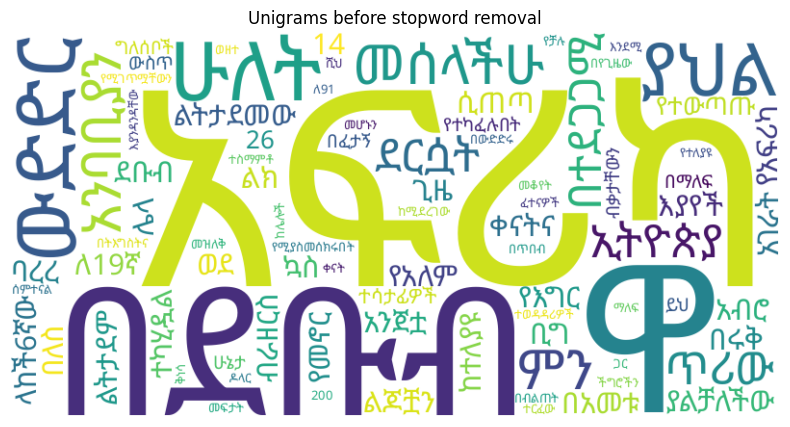

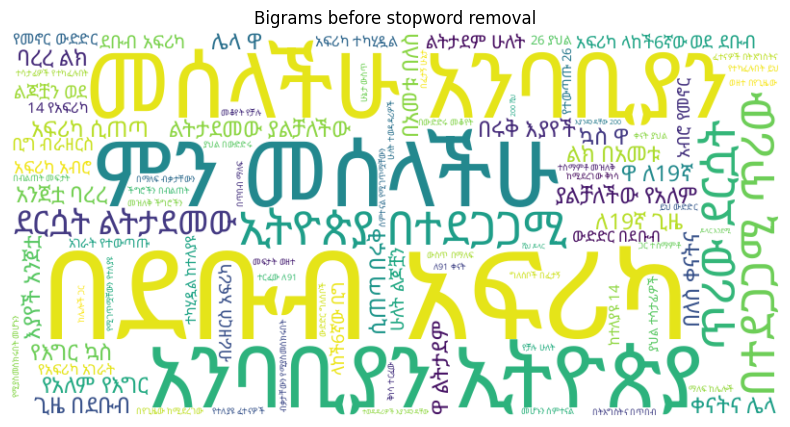

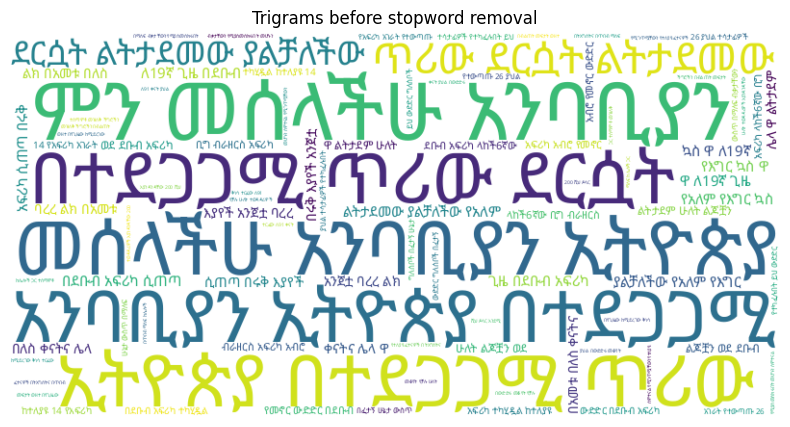

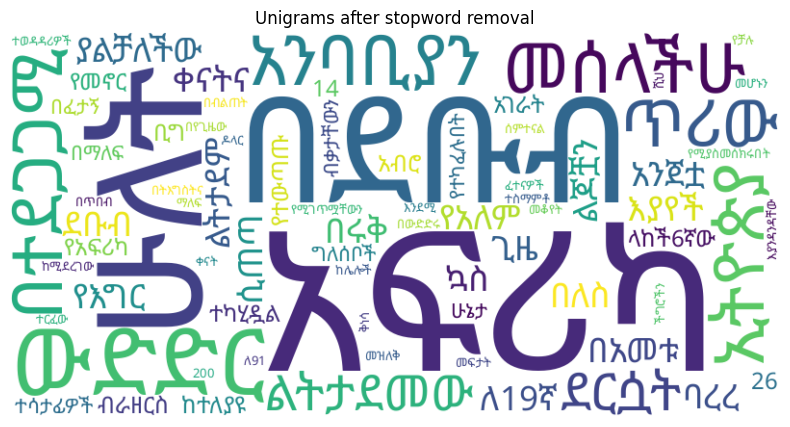

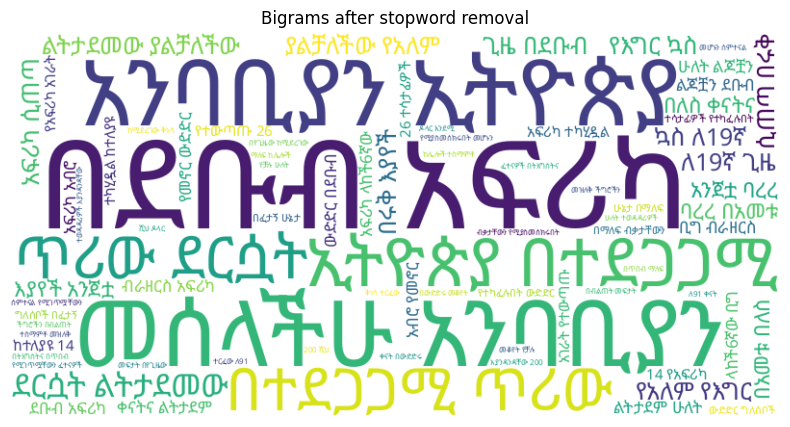

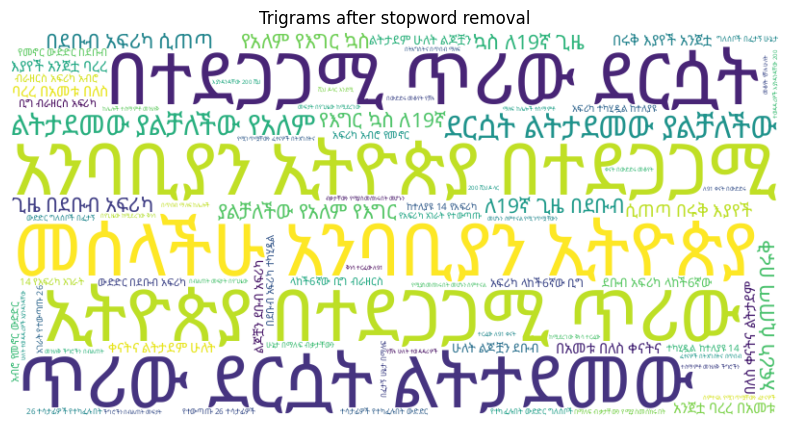

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to plot word clouds
def plot_wordcloud(data, title, font_path):
    # Convert n-gram tuples to strings for word cloud
    data = { ' '.join(ngram): prob for ngram, prob in data.items() }

    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', font_path=font_path).generate_from_frequencies(data)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Example: Specify the path to your custom font (you can download an Amharic-supporting font)
font_path = '/content/NotoSansEthiopic-VariableFont_wdth,wght.ttf'  # Update this path

# Word clouds before stopword removal
plot_wordcloud(dict(unigram_probs), "Unigrams before stopword removal", font_path)
plot_wordcloud(dict(bigram_probs), "Bigrams before stopword removal", font_path)
plot_wordcloud(dict(trigram_probs), "Trigrams before stopword removal", font_path)

# Word clouds after stopword removal (assuming you have these probabilities calculated)
plot_wordcloud(dict(get_ngram_probabilities(generate_ngrams(tokens_no_stopwords, 1))), "Unigrams after stopword removal", font_path)
plot_wordcloud(dict(bigram_probs_no_stop), "Bigrams after stopword removal", font_path)
plot_wordcloud(dict(trigram_probs_no_stop), "Trigrams after stopword removal", font_path)

In [27]:
sentence = "ኢትዮጵያ ታሪካዊ ሀገር ናት"
sentence_tokens = sentence.split()
bigram_sentence = generate_ngrams(sentence_tokens, 2)

probability = 1.0
for bigram in bigram_sentence:
    word1, word2 = bigram
    probability *= conditional_probability(word1, word2, bigram_counts, unigram_counts)

print("Probability of sentence:", probability)


Probability of sentence: 1e-30


Task 1.7: Generate Random Sentences Using N-grams
**bold text**

In [23]:
import random

def generate_sentence(n, ngram_probs, length=10):
    sentence = []
    for i in range(length):
        next_word = random.choices(list(ngram_probs.keys()), weights=list(ngram_probs.values()))[0]
        sentence.extend(next_word if type(next_word) == tuple else [next_word])
    return ' '.join(sentence)

print("Generated sentence (unigrams):", generate_sentence(1, unigram_probs))
print("Generated sentence (bigrams):", generate_sentence(2, bigram_probs))
print("Generated sentence (trigrams):", generate_sentence(3, trigram_probs))


Generated sentence (unigrams): ይህ ከተለያዩ ያህል ቢግ ያህል ጋር ለ91 ተስማምቶ አንባቢያን ሲጠጣ
Generated sentence (bigrams): ሺህ ዶላር ለ19ኛ ጊዜ ለ91 ቀናት በየጊዜው ከሚደረገው የተለያዩ ፈተናዎች ቀናት ያህል ሰምተናል የሚገጥሟቸውን ተርፈው ለ91 ምን መሰላችሁ ላከች6ኛው ቢግ
Generated sentence (trigrams): አፍሪካ ተካሂዷል ከተለያዩ ለ91 ቀናት ያህል በትእግስትና በጥበብ ማለፍ ሰምተናል የሚገጥሟቸውን የተለያዩ አፍሪካ ተካሂዷል ከተለያዩ ምን መሰላችሁ አንባቢያን የተውጣጡ 26 ያህል አንጀቷ ባረረ ልክ በጥበብ ማለፍ ከሌሎች ሁለት ልጆቿን ወደ


**2**

In [41]:
import math

def calculate_perplexity(ngram_probs, ngram_data, n):
    # ngram_probs: Dictionary of ngram probabilities
    # ngram_data: List of n-grams in the test corpus

    log_prob_sum = 0
    for ngram in ngram_data:
        ngram_tuple = tuple(ngram)
        prob = ngram_probs.get(ngram_tuple, 0)
        if prob > 0:
            log_prob_sum += math.log2(prob)

    # Calculate Perplexity
    N = len(ngram_data)
    perplexity = math.pow(2, -log_prob_sum / N)
    return perplexity

# Example for Unigrams, Bigrams, Trigrams:
unigram_perplexity = calculate_perplexity(dict(unigram_probs), unigrams, 1)
bigram_perplexity = calculate_perplexity(dict(bigram_probs), bigrams, 2)
trigram_perplexity = calculate_perplexity(dict(trigram_probs), trigrams, 3)

print(f"Unigram Perplexity: {unigram_perplexity}")
print(f"Bigram Perplexity: {bigram_perplexity}")
print(f"Trigram Perplexity: {trigram_perplexity}")

Unigram Perplexity: 83.30792990658959
Bigram Perplexity: 92.62387797546437
Trigram Perplexity: 93.00000000000003


3

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Example: Using n-gram features for text classification
def ngram_features(texts, ngram_model, n):
    ngram_features = []
    for text in texts:
        ngrams = generate_ngrams(text.split(), n)
        feature_vector = { ' '.join(ngram): ngram_model.get(ngram, 0) for ngram in ngrams }
        ngram_features.append(feature_vector)
    return ngram_features

# Example texts and labels (replace with your actual dataset)
texts = ["This is a great movie", "I hate this film", "Amazing storyline"]
labels = [1, 0, 1]  # 1 = Positive, 0 = Negative

# Generate features using your n-gram model (e.g., bigrams)
bigram_features = ngram_features(texts, dict(bigram_probs), 2)

# Convert features to matrix format
vectorizer = CountVectorizer()
X = vectorizer.fit_transform([' '.join(feature) for feature in bigram_features])

# Train a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X, labels)

# Make predictions and evaluate
predictions = clf.predict(X)
print("Accuracy:", accuracy_score(labels, predictions))
print("Classification Report:")
print(classification_report(labels, predictions))


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

